In [1]:
!pip install librosa --use-feature=2020-resolver

  Using cached numba-0.56.3-cp38-cp38-win_amd64.whl (2.5 MB)
  Using cached numba-0.56.2-cp38-cp38-win_amd64.whl (2.5 MB)
  Using cached numba-0.56.0-cp38-cp38-win_amd64.whl (2.5 MB)
  Attempting uninstall: resampy
    Found existing installation: resampy 0.4.2
    Uninstalling resampy-0.4.2:
      Successfully uninstalled resampy-0.4.2


In [3]:
import librosa
import librosa.display

import IPython.display as ipd

import numpy as np
import matplotlib.pyplot as plt

audio_path = './Soundtest/steth_20190801_09_51_07.wav'

In [4]:
ipd.Audio(audio_path)

In [5]:
# sr = 16000이 의미하는 것은 1초당 16000개의 데이터를 샘플링 한다는 것입니다. sampling rate=16000
y, sr = librosa.load(audio_path, sr=16000)

print('sr:', sr, ', audio shape:', y.shape)
print('length:', y.shape[0]/float(sr), 'secs')

sr: 16000 , audio shape: (240000,)
length: 15.0 secs


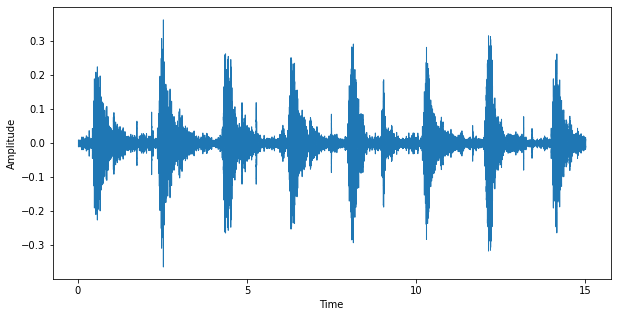

In [6]:
plt.figure(figsize = (10,5))
librosa.display.waveshow(y, sr=sr)
plt.ylabel("Amplitude")
plt.show()

2. FFT (Fast Fourier Transform)Permalink
Fourier Transform: time-domain의 그래프를 frequency-domain으로 변환시켜주는 작업

y파형을 주파수 분석을 통해, 특정 시간에 주파수 성분이 어떻게 구성되어 있는지 확인할 수 있다. 음성 데이터 분석을 할 때 주파수 분석 기법을 많이 사용한다.

numpy에 함수가 제공된다.

Text(0.5, 1.0, 'Power spectrum')

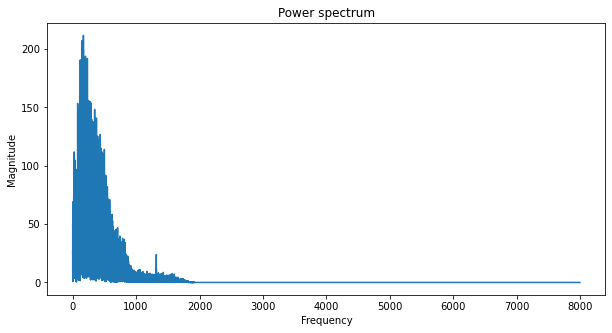

In [7]:
# Fourier -> Spectrum

fft = np.fft.fft(y)

magnitude = np.abs(fft) 
frequency = np.linspace(0,sr,len(magnitude))

left_spectrum = magnitude[:int(len(magnitude) / 2)]
left_frequency = frequency[:int(len(frequency) / 2)]

plt.figure(figsize = (10,5))
plt.plot(left_frequency, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [8]:
n_fft = 2048 
hop_length = 512 

stft = librosa.stft(y, n_fft = n_fft, hop_length = hop_length)
spectrogram = np.abs(stft)
print("Spectogram :\n", spectrogram)

Spectogram :
 [[4.19306964e-01 2.09975123e-01 6.84383437e-02 ... 1.48588967e+00
  1.89199853e+00 2.07353163e+00]
 [4.23262328e-01 2.34930128e-01 5.24472743e-02 ... 7.02133298e-01
  9.35217023e-01 1.69194961e+00]
 [5.44351399e-01 3.13819110e-01 2.67883509e-01 ... 1.52875900e-01
  5.44511318e-01 1.11639595e+00]
 ...
 [2.06743265e-04 1.03195482e-04 2.40845139e-08 ... 4.35466596e-08
  1.12825073e-05 2.05119752e-04]
 [2.06754688e-04 1.03206454e-04 3.32521708e-08 ... 6.22414618e-08
  1.12715179e-05 2.05149961e-04]
 [2.06764031e-04 1.03231250e-04 8.66448602e-09 ... 6.46554525e-08
  1.13681945e-05 2.05187360e-04]]


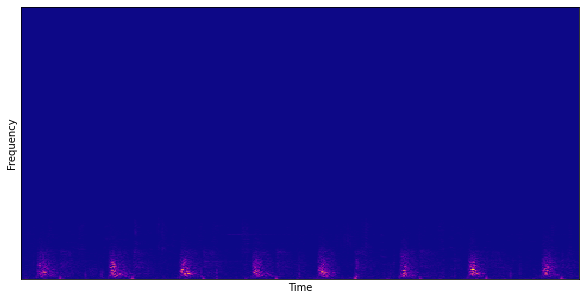

In [9]:
plt.figure(figsize = (10,5))
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.plasma()
plt.show()

Log-spectogramPermalink
spectrogram : 시간에 따라 변화하는 신호의 주파수 스펙트럼의 크기를 시각적으로 표현한 것

보통 푸리에변환 이후 dB(데시벨) scaling을 적용한 Log-spectogram을 구한다. 다분히 시각적인 이유뿐만 아니라, 사람의 청각 또한 소리를 dB scale 로 인식하기 때문에, 이를 반영하여 spectogram을 나타내는 것이 분석에 용이하다.

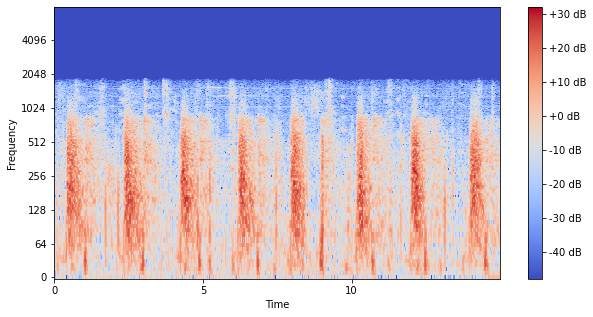

In [10]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize = (10,5))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")


4. MFCC (Mel Frequency Cepstral Coefficient)Permalink
MFCC: 오디오 신호 처리 분야에서 많이 사용되는 소리 데이터의 특징값(Feature)

사람의 청각이 예민하게 반응하는 정보를 강조하여 소리가 가지는 고유한 특징을 추출한 값이다.

librosa.feature.mfcc(audio, sr, n_mfcc, n_fft, hop_length)

sr
default값은 22050Hz이다. 앞서 음성 데이터를 load 할 때 sr을 16000Hz으로 했기 때문에 꼭 sr=16000을 파라미터로 삽입해야 한다. (사람의 목소리는 대부분 16000Hz 안에 포함된다고 한다)

n_mfcc
return 될 mfcc의 개수를 정해주는 파라미터이다. default값은 20이다.

n_fft
win_length보다 길 경우 모두 zero padding해서 처리하기 위한 파라미터 default는 win_length와 같다.

일반적으로 자연어 처리에서는 음성을 25m의 크기를 기본으로 하고 있으며 16000Hz인 음성에서는 400에 해당하는 값이다. (16000 * 0.025 = 400) 즉, n_fft는 sr에 frame_length인 0.025를 곱한 값이다.

hop_length
얼마만큼 시간 주기를 이동하면서 분석을 할 것인지에 대한 파라미터, 10ms를 기본으로 하고 있어 16000Hz인 음성에서는 160에 해당한다.(16000 * 0.01 = 160) 즉, hop_length는 sr에 frame_stride인 0.01를 곱해서 구할 수 있다.

window_length가 0.025이고 frame_stride가 0.01이라고 하면 0.015초씩은 데이터를 겹치면서 읽는다고 생각하면 됩니다.

In [11]:
mfcc = librosa.feature.mfcc(y, sr=16000, n_mfcc=20, n_fft=n_fft, hop_length=hop_length)

print("MFCC Shape: ", mfcc.shape)
print("MFCC: \n", mfcc)

MFCC Shape:  (20, 469)
MFCC: 
 [[-5.1420074e+02 -5.0475555e+02 -4.9330417e+02 ... -4.7356525e+02
  -4.7646945e+02 -4.7827475e+02]
 [ 1.5663690e+02  1.6663403e+02  1.8027278e+02 ...  2.0725812e+02
   2.0326126e+02  1.9981750e+02]
 [ 2.5018291e+01  2.9427494e+01  3.7422127e+01 ...  5.6779678e+01
   5.3155769e+01  4.9173122e+01]
 ...
 [ 2.4201136e+00  4.0841265e+00 -9.3014491e-01 ...  4.9512153e+00
   7.0477352e+00  9.5951309e+00]
 [-2.9926240e+00 -2.7444234e+00 -3.9458070e+00 ... -4.2783823e+00
  -1.8723495e+00  9.2624128e-01]
 [-2.9371876e-01 -2.4855952e+00  1.6865149e+00 ... -7.1408262e+00
  -5.4340410e+00 -5.2762799e+00]]


<ipython-input-11-27c226d10137>:1: FutureWarning: Pass y=[ 0.00042538  0.00042083  0.00034975 ... -0.00377098 -0.00247043
 -0.00119327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(y, sr=16000, n_mfcc=20, n_fft=n_fft, hop_length=hop_length)


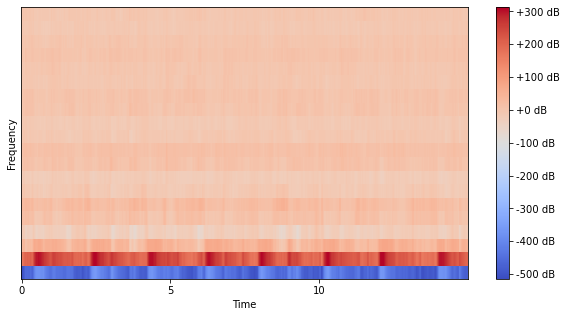

In [12]:
plt.figure(figsize = (10,5))
librosa.display.specshow(mfcc, sr=16000, hop_length=hop_length, x_axis='time')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()